## Import Libraries and Generate Dataset

Here, we import necessary libraries and create a synthetic dataset for regression using sklearn.datasets.make_regression. The dataset is then split into training and testing sets with train_test_split.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Generate a regression dataset
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [3]:
# Print shapes of the train/test datasets
print("The shape of X_train: ", X_train.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of X_test: ", X_test.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X_train:  (80, 1)
The shape of y_train:  (80,)
The shape of X_test:  (20, 1)
The shape of y_test:  (20,)


## Visualizing the Dataset

The scatter plot visualizes our synthetic dataset. Each point represents a data instance with its corresponding regression target.

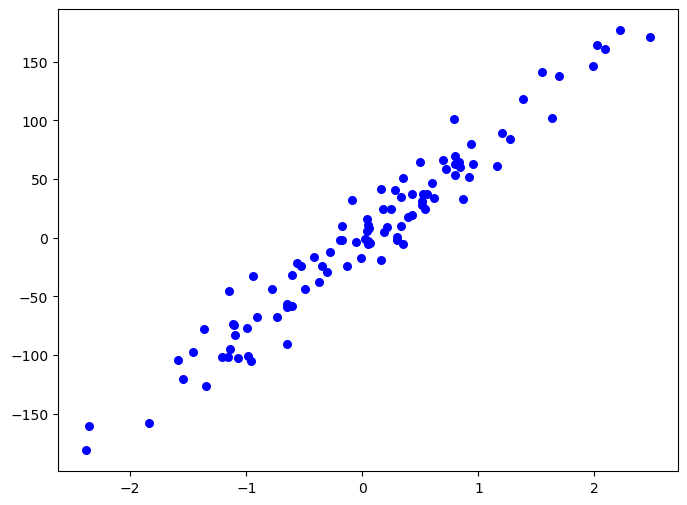

In [4]:
# Plotting the dataset
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
plt.show()

## Implementing Linear Regression

This section defines the LinearRegression class. It includes methods for fitting the model to the training data using gradient descent and making predictions. The fit method adjusts the weights and bias based on the training data, and the predict method uses these parameters to predict the output for new data.

In [5]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000, record_steps=[1, 10, 100]):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.record_steps = record_steps
        self.recorded_weights = []
        self.costs = [] 

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)
            cost = np.mean((y - y_pred)**2)
            self.costs.append(cost)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            if i in self.record_steps:
                self.recorded_weights.append((self.weights.copy(), self.bias))

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

## Training the Model and Making Predictions

Here, we create an instance of our LinearRegression model with a learning rate of 0.01. We then fit the model to our training data and use it to make predictions on the test set. The Mean Squared Error (MSE) is calculated to evaluate the performance of the model.

In [6]:
# Training the linear regression model
reg = LinearRegression(lr=0.01, n_iters=1000, record_steps=[1, 10, 50, 100, 500, 999])
reg.fit(X_train, y_train)

In [7]:
# Making predictions on the test set
prediction = reg.predict(X_test)
# Calculating Mean Squared Error
mse = mean_squared_error(y_test, prediction)
mse

305.7719958301902

## Visualizing the Cost Function Over Iterations


To understand the optimization process of our machine learning model, it's crucial to observe how the cost function evolves as the model learns. The plot_cost_function function is designed for this purpose. Here's how it works and why it's important.

In [8]:
# Visualization Function for Cost Function
def plot_cost_function(reg):
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(reg.n_iters), reg.costs, label='Cost Function', color='blue')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function vs. Iteration')
    plt.legend()
    plt.show()

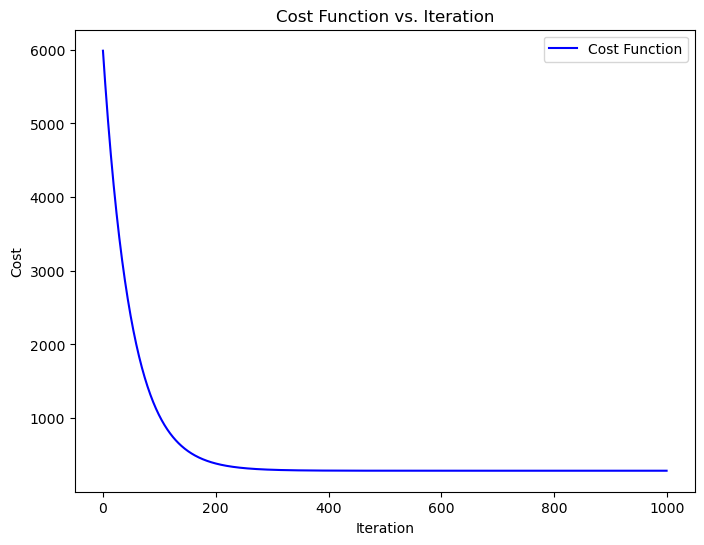

In [9]:
# Visualization of the Cost Function
plot_cost_function(reg)

## Visualizing the Regression Line

In the final plot, we visualize the regression line over the entire dataset. The scatter plot shows the training and test data points, and the red line represents our model's predictions across the range of X.

In [10]:
# Visualization Function
def plot_gradient_descent(X, y, reg):
    cmap = plt.get_cmap('viridis')
    fig, ax = plt.subplots(figsize=(8,6))
    
    # Scatter plot of the data points
    ax.scatter(X[:, 0], y, color=cmap(0.9), s=10)
    
    # Generate predictions for each recorded step
    for weights, bias in reg.recorded_weights:
        y_pred_line = np.dot(X, weights) + bias
        ax.plot(X[:, 0], y_pred_line, linestyle='--', label=f'Iteration: {reg.record_steps[reg.recorded_weights.index((weights, bias))]}')
    
    # Plot settings
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Target y')
    plt.legend()
    plt.show()

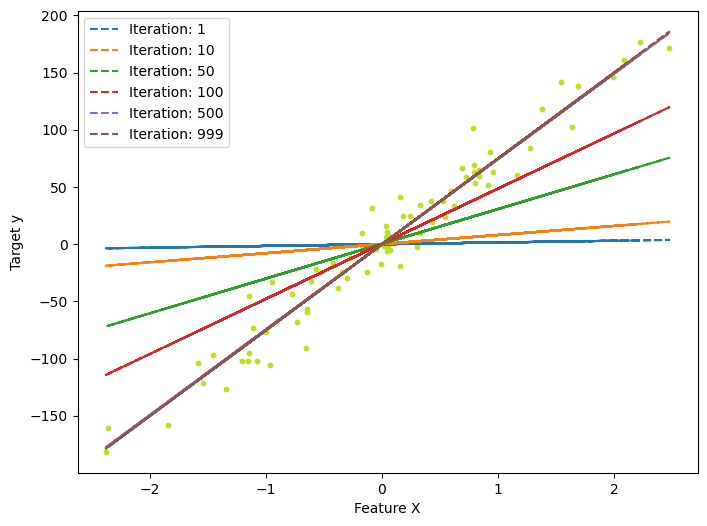

In [11]:
# Visualization of Gradient Descent
plot_gradient_descent(X_train, y_train, reg)

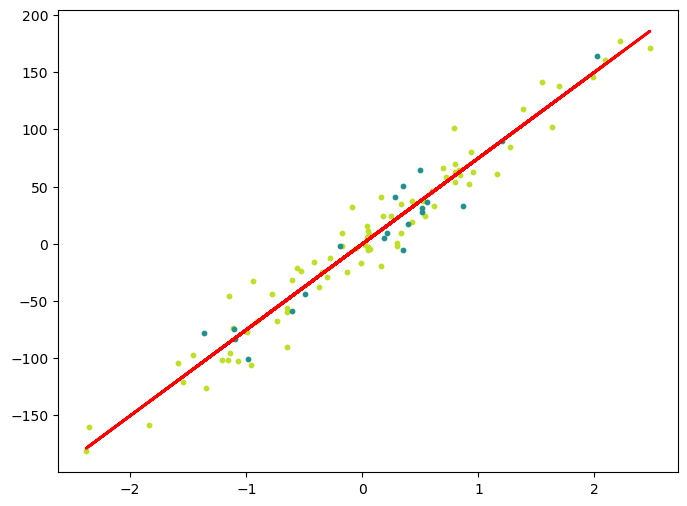

In [12]:
# Predicting values for the entire dataset
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
# Scatter plot of training and test data
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
# Plotting the regression line
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Prediction')
plt.show()